## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [6]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [4]:
#等寬劃分
app_train["equal_width_age"]= pd.cut(app_train['DAYS_BIRTH']/365,10)
app_train["equal_width_age"].value_counts()

(35.099, 39.959]    41758
(39.959, 44.819]    40350
(30.238, 35.099]    38430
(44.819, 49.679]    34311
(49.679, 54.54]     33544
(25.378, 30.238]    33127
(54.54, 59.4]       32650
(59.4, 64.26]       27685
(20.469, 25.378]    13679
(64.26, 69.121]     11977
Name: equal_width_age, dtype: int64

In [5]:
app_train.groupby("equal_width_age").mean()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
equal_width_age,,,,,,,,,,,,,,,,,,,,,
"(20.469, 25.378]",277118.454931,0.122012,0.248410,0.321442,0.626435,0.225967,146812.838906,420473.132064,21960.732015,379885.046374,...,0.030704,0.005775,0.004532,0.004679,0.195117,0.200307,0.020104,0.489144,0.007822,0.002705
"(25.378, 30.238]",277872.170284,0.111390,0.104718,0.384822,0.603828,0.546956,165428.742611,510049.971730,25966.069132,459252.060265,...,0.028647,0.007849,0.005585,0.005192,0.211308,0.201558,0.018233,0.504000,0.008241,0.003351
"(30.238, 35.099]",277950.762581,0.101900,0.098855,0.410226,0.630367,0.821858,178402.528319,573771.345316,27448.987418,515618.177545,...,0.027296,0.007598,0.006609,0.005491,0.214104,0.207728,0.018241,0.514026,0.007494,0.003955
"(35.099, 39.959]",278231.199650,0.089468,0.095359,0.405288,0.661143,0.846808,179638.253952,628073.474975,28280.686723,564980.878216,...,0.030461,0.007424,0.006729,0.004790,0.216485,0.206787,0.017961,0.518440,0.008118,0.007998
"(39.959, 44.819]",278847.830260,0.078984,0.094895,0.392763,0.684734,0.591078,181461.771472,648989.912900,28760.253606,583220.956358,...,0.031202,0.008055,0.006047,0.005675,0.211202,0.215762,0.018191,0.522181,0.008005,0.015043
"(44.819, 49.679]",278129.980793,0.074437,0.090292,0.360701,0.747136,0.298971,180215.213831,667663.245956,28975.970868,597111.565060,...,0.028854,0.006878,0.005742,0.005567,0.209087,0.218356,0.017895,0.518172,0.007898,0.032876
"(49.679, 54.54]",278234.514906,0.067911,0.082518,0.313946,0.736913,0.116176,172035.743768,655650.163129,28281.306010,589099.545369,...,0.029424,0.007840,0.005903,0.005426,0.214226,0.213540,0.017022,0.521524,0.007155,0.112896
"(54.54, 59.4]",278670.381593,0.055926,0.080000,0.257917,0.748545,0.045329,159623.480525,641656.692083,27021.529128,577424.158235,...,0.030138,0.007443,0.005207,0.005145,0.214211,0.205636,0.015406,0.509740,0.007320,0.519541
"(59.4, 64.26]",278065.054145,0.052953,0.077370,0.207513,0.770309,0.017627,146854.160421,604548.584017,25642.715478,543748.358674,...,0.033412,0.007802,0.005057,0.005310,0.228644,0.211992,0.014882,0.533719,0.006285,0.781398


D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


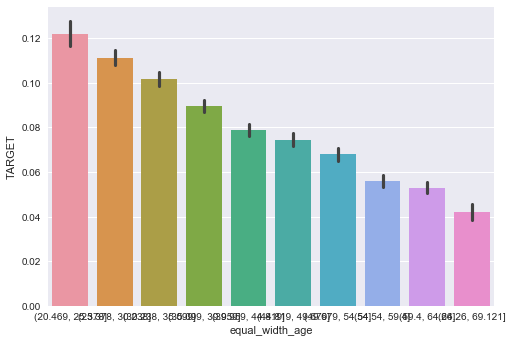

In [7]:
sns.barplot(app_train["equal_width_age"], app_train["TARGET"])

In [8]:
#等寬劃分
app_train["equal_freq_age"]= pd.qcut(app_train['DAYS_BIRTH']/365,10)
app_train["equal_freq_age"].value_counts()

(43.151, 47.178]    30764
(28.175, 32.038]    30760
(36.0, 39.496]      30759
(51.74, 56.093]     30758
(56.093, 60.77]     30757
(20.517, 28.175]    30752
(39.496, 43.151]    30745
(32.038, 36.0]      30745
(60.77, 69.121]     30738
(47.178, 51.74]     30733
Name: equal_freq_age, dtype: int64

In [9]:
app_train.groupby("equal_freq_age").mean()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
equal_freq_age,,,,,,,,,,,,,,,,,,,,,
"(20.517, 28.175]",277800.759008,0.115700,0.174850,0.351197,0.611863,0.359554,155266.928742,461909.588905,23843.024341,416843.833882,...,0.029982,0.006894,0.004845,0.004878,0.201515,0.201808,0.019153,0.496130,0.008455,0.003154
"(28.175, 32.038]",277548.598472,0.109948,0.095254,0.402503,0.613134,0.693953,171002.089584,544776.587760,26945.294525,489880.340042,...,0.026951,0.007282,0.006242,0.005819,0.217230,0.204226,0.018498,0.512159,0.007477,0.003381
"(32.038, 36.0]",278169.787640,0.098065,0.097805,0.411091,0.636136,0.865376,181334.451403,584783.129419,27666.731704,525605.533716,...,0.029110,0.008196,0.007383,0.004619,0.211807,0.206180,0.017369,0.512506,0.007351,0.004293
"(36.0, 39.496]",277731.087259,0.088527,0.096622,0.404142,0.665756,0.850093,179388.195813,631895.378670,28283.318714,568093.995589,...,0.029715,0.007120,0.006112,0.005072,0.218050,0.206704,0.018304,0.518222,0.007965,0.008355
"(39.496, 43.151]",278910.771930,0.079037,0.096178,0.395674,0.681477,0.657733,181680.970226,641744.682973,28615.418472,577188.347191,...,0.031745,0.008196,0.006050,0.005855,0.211319,0.217629,0.018832,0.526492,0.008489,0.013401
"(43.151, 47.178]",278781.486348,0.077948,0.092446,0.378754,0.722533,0.415583,181763.084779,666989.954070,29096.874053,597171.623333,...,0.031368,0.007476,0.006111,0.005331,0.209368,0.214309,0.017781,0.516740,0.008191,0.023144
"(47.178, 51.74]",278125.289851,0.071357,0.086552,0.339505,0.742882,0.201672,176551.506606,661218.076091,28702.964824,593272.151780,...,0.027039,0.007386,0.005792,0.005597,0.211727,0.218723,0.017896,0.520450,0.007516,0.055998
"(51.74, 56.093]",278433.394662,0.063431,0.080272,0.297906,0.736654,0.081182,167904.981710,652584.819397,27830.086940,586281.398126,...,0.029911,0.007640,0.005657,0.005202,0.215749,0.209539,0.015963,0.518174,0.007283,0.215716
"(56.093, 60.77]",278788.376207,0.054232,0.078486,0.240271,0.758559,0.032220,156032.239007,633107.223738,26667.147922,569619.973246,...,0.030042,0.007153,0.004942,0.005332,0.216829,0.206815,0.015346,0.513574,0.006665,0.629255


D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


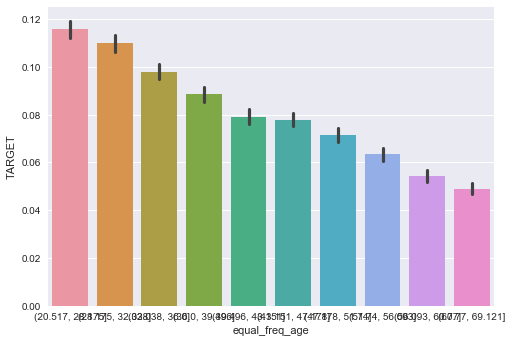

In [10]:
sns.barplot(app_train["equal_freq_age"], app_train["TARGET"])